In [20]:
CLR = {
    'blue': ['#e0f3ff', '#aadeff', '#2bb1ff', '#15587f', '#0b2c40'],
    'gold': ['#fff3dc', '#ffebc7', '#ffddab', '#b59d79', '#5C4938'],
    'red':  ['#ffd8e8', '#ff9db6', '#ff3e72', '#6B404C', '#521424'],
    'gray': ['#eeeeee', '#bbbbbb', '#999999', '#666666', '#333333'],
}

# Ad-Hoc DB Fun

In [96]:
import pickle
import pathlib

import numpy as np
from tabulate import tabulate

import matplotlib.pyplot as plt
import matplotlib.patches as ppt

In [2]:
with open('../opt/databases/180921_ungol.db.pickle', 'rb') as fd:
    db = pickle.load(fd)

print(str(db))

TODO: loading config from ...ca/ungol-models/conf/logging.conf
recalculating avg doclen

VNGOL database
  containing: 294659 documents
  vocabulary: 400000 words
  filtering: 0 stopwords
  code size: 256 bits
  tokens: 258391
  avg. doc length: 197.35699
  skipped: 8



In [3]:
# maximum idf
import math
math.log(len(db.mapping))

12.593574034513647

### Plotting Helper

In [4]:
out_dir = pathlib.Path('opt/')

def _fig_before(title: str, xlabel, ylabel):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        return fig, ax

def _fig_after(fig, ax, patches = None, fname = None):
    if patches:
        ax.legend(handles=patches)
    
    if display:
        plt.show(fig)
    if fname:
        for out_file in [str(out_dir/fname) + s for s in ('.png', '.svg')]:
            print('saving to', out_file)
            fig.savefig(out_file)

    plt.close(fig)

## TF and DF Distribution

In [5]:
tf_counts = [(int(freq), db.docref.lookup[idx]) for idx, freq in db.docref.termfreqs.items()]
df_counts = [(int(freq), db.docref.lookup[idx]) for idx, freq in db.docref.docfreqs.items()]

tf_counts.sort(reverse=True)
df_counts.sort(reverse=True)

In [6]:
print('tf:\n', tf_counts[:5], '\n', tf_counts[100:105], '\n', tf_counts[-5:])

tf:
 [(3303004, 'der'), (3090395, 'die'), (1848874, 'und'), (1608926, 'in'), (1038367, 'den')] 
 [(79624, 'straße'), (79207, 'eines'), (79059, 'keine'), (79033, 'können'), (79004, 'grund')] 
 [(1, 'aaltonen'), (1, 'aalstrich'), (1, 'aalfang'), (1, 'aaaah'), (1, 'aaaa')]


In [7]:
print('df:\n', df_counts[:5], '\n', df_counts[100:105], '\n', df_counts[-5:])

df:
 [(285160, 'der'), (280236, 'die'), (270868, 'in'), (268025, 'und'), (238140, 'den')] 
 [(51730, 'dass'), (51306, 'schon'), (50688, 'bundes'), (50458, 'haus'), (50391, 'teil')] 
 [(1, 'aalstrich'), (1, 'aalfang'), (1, 'aai'), (1, 'aaaah'), (1, 'aaaa')]


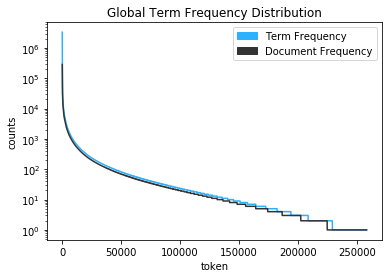

saving to opt/corpus-tf-df-distribution.png
saving to opt/corpus-tf-df-distribution.svg


In [179]:
fig, ax = _fig_before('Global Term Frequency Distribution', 'token', 'counts')

# all
ax.set_yscale('log')
sl = slice(0, len(tf_counts))

# range
# sl = slice(10, 100)

patches = []

color = CLR['blue'][2]
ax.plot(range(len(tf_counts))[sl], [cnt for cnt, word in tf_counts][sl], color=color)
patches.append(ppt.Patch(color=color, label='Term Frequency'))

color = CLR['gray'][4]
ax.plot(range(len(df_counts))[sl], [cnt for cnt, word in df_counts][sl], color=color)
patches.append(ppt.Patch(color=color, label='Document Frequency'))

_fig_after(fig, ax, fname='corpus-tf-df-distribution', patches=patches)

## Tokens for a single topic

In [10]:
# 174-AH
selection = ['SDA.950810.0099',
 'SDA.950810.0170',
 'SDA.950811.0023',
 'SDA.950822.0087',
 'SDA.950907.0249',
 'SDA.950908.0073',
 'SDA.950910.0111',
 'SDA.950911.0127',
 'SDA.950912.0115',
 'SDA.950921.0075',
 'SDA.950922.0111',
 'SDA.950923.0035',
 'SDA.950923.0072',
 'SDA.950924.0028',
 'SDA.951002.0038',
 'SDA.951013.0032',
 'SDA.951213.0056',
 'SPIEGEL9495-011260',
 'SPIEGEL9495-011263',
 'SPIEGEL9495-011395',
 'SPIEGEL9495-011396',
 'SPIEGEL9495-011409',
 'SPIEGEL9495-011498',
 'SPIEGEL9495-011503',
 'SPIEGEL9495-011508',
 'SPIEGEL9495-011522',
 'SPIEGEL9495-011523',
 'SPIEGEL9495-011524',
 'SPIEGEL9495-011937',
 'SPIEGEL9495-011946',
 'SPIEGEL9495-012199',
 'SPIEGEL9495-012211',
 'SPIEGEL9495-012225',
 'SPIEGEL9495-012909',
 'SPIEGEL9495-013181',
 'SPIEGEL9495-013587']

In [11]:
tab_data = []
for doc_id in selection:
    doc = db.mapping[doc_id]
    tab_data.append((doc_id, len(doc)))

print(tabulate(tab_data))

print(db.mapping['SDA.950922.0111'].tokens)

------------------  ----
SDA.950810.0099      302
SDA.950810.0170      152
SDA.950811.0023      252
SDA.950822.0087      319
SDA.950907.0249      233
SDA.950908.0073      268
SDA.950910.0111      343
SDA.950911.0127      119
SDA.950912.0115      185
SDA.950921.0075      153
SDA.950922.0111       79
SDA.950923.0035      261
SDA.950923.0072      100
SDA.950924.0028      107
SDA.951002.0038      238
SDA.951013.0032       96
SDA.951213.0056      204
SPIEGEL9495-011260  1632
SPIEGEL9495-011263   672
SPIEGEL9495-011395   742
SPIEGEL9495-011396    88
SPIEGEL9495-011409   708
SPIEGEL9495-011498   116
SPIEGEL9495-011503    58
SPIEGEL9495-011508   800
SPIEGEL9495-011522   825
SPIEGEL9495-011523    69
SPIEGEL9495-011524   568
SPIEGEL9495-011937   271
SPIEGEL9495-011946   605
SPIEGEL9495-012199   108
SPIEGEL9495-012211   645
SPIEGEL9495-012225   713
SPIEGEL9495-012909   365
SPIEGEL9495-013181   798
SPIEGEL9495-013587    93
------------------  ----
['in', 'der', 'kreuze', 'bayerischen', 'des', 'zwe

# Document Length Distribution

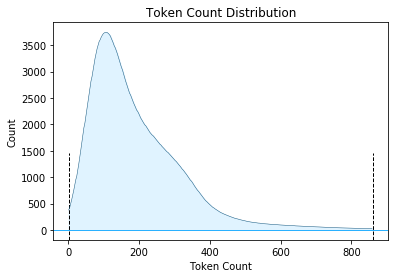

saving to opt/corpus-token-distribution.png
saving to opt/corpus-token-distribution.svg


In [166]:
tokens = np.array([len(d) for d in db.mapping.values()])
bins, edges = np.histogram(tokens, bins=1000)
upper = 300

def _rolling_mean(a: np.array, window: int):
    assert len(a.shape) == 1
    
    a_prev = np.repeat(a[0], window // 2)
    a_post = np.repeat(a[-1], window // 2 - 1)
    
    x = np.concatenate((a_prev, a, a_post))
    v = np.ones((window, )) / window
    
    return np.convolve(x, v, mode='valid')

bins = _rolling_mean(bins, 30)
fig, ax = _fig_before('Token Count Distribution', 'Token Count', 'Count')

vline_style = dict(ls='dashed', color='black', linewidth=1)
ax.axhline(0, color=CLR['blue'][2], linewidth=1)
ax.axvline(edges[0], ymax=0.4, **vline_style)
ax.axvline(edges[upper], ymax=0.4, **vline_style)

ax.fill_between(edges[:upper], bins[:upper], color=CLR['blue'][0])
ax.plot(edges[:upper], bins[:upper], color=CLR['blue'][3], linewidth=0.5)

# ax.plot(edges[:200], bins[:200], color=CLR['blue'])
_fig_after(fig, ax, fname='corpus-token-distribution')

In [15]:
document = 'herr von ribbeck auf ribbeck im havelland'

In [16]:
doc = wmd.Doc.from_tokens('ribbeck', document.split(' '), db.docref)
print(doc)

NameError: name 'wmd' is not defined

In [ ]:
db += doc

In [ ]:
print(doc.idx)
print(doc.tokens)
print(doc.cnt)
print(doc.freq)

from pprint import pprint
pprint(list(zip(doc.tokens, doc.idx, doc.cnt, doc.freq)))

In [ ]:
a_df = np.array([db.docref.docfreqs[idx] for idx in doc.idx])
a_idf = np.log(len(db.mapping) / a_df)

print(a_df)
print(a_idf)

In [ ]:
db.docref.codemap.shape

In [ ]:
for i, code in enumerate(doc.codes):
    print(i, ' '.join([hex(b) for b in code][:4]) + '...')

## Distance Distribution

In [22]:
db.docref.meta

{'bits': 256, 'words': 400000, 'knn': [1, 11, 101, 1001, 3999]}

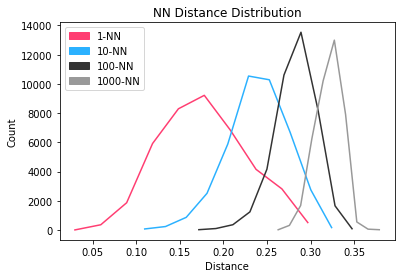

saving to opt/nn-distribution.png
saving to opt/nn-distribution.svg


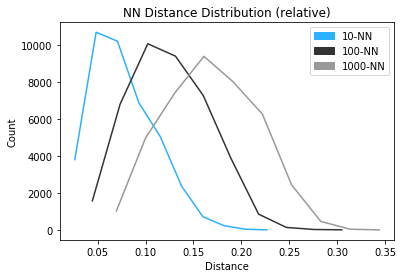

In [135]:
meta = db.docref.meta
dm = db.docref.distmap[:40000] / meta['bits']
colors = CLR['red'][2], CLR['blue'][2], CLR['gray'][4], CLR['gray'][2]

fig, ax = _fig_before('NN Distance Distribution', 'Distance', 'Count')
patches = []

for i, color in zip(range(dm.shape[1]), colors):
    nn = max(1, meta["knn"][i] - 1)
    bins, edges = np.histogram(dm[:, i], bins=10)
    plt.plot(edges[1:, ], bins, color=color)
    patches.append(ppt.Patch(color=color, label=f'{nn}-NN'))

_fig_after(fig, ax, patches=patches, fname='nn-distribution')


fig, ax = _fig_before('NN Distance Distribution (relative)', 'Distance', 'Count')
patches = []

for i, color in zip(range(1, dm.shape[1]), colors[1:]):
    nn = max(1, meta["knn"][i] - 1)
    bins, edges = np.histogram(dm[:, i] - dm[:, 0], bins=10)
    plt.plot(edges[1:, ], bins, color=color)
    patches.append(ppt.Patch(color=color, label=f'{nn}-NN'))
    
_fig_after(fig, ax, patches=patches)

### Distance Examples

In [69]:
# load nearest neighbour maps (the database uses the hamming dists)
from ungol.models import analyze

In [71]:
f_mapping = '../../ungol-models/opt/experiments/binary/fasttext.de-256x2/hamming.h5'
f_vocab = '../../ungol-models/opt/embeddings/fasttext/wiki.de.400k.vocabulary.pickle'

nn = analyze.Neighbours.from_file(f_mapping, f_vocab)

In [95]:
COL = 0
nn_idx = meta['knn'][COL]

# lower bound inclusive; upper bound exclusive
# selects from column <col> the indexes of values who fall in the range
def get_from_range(a, lower, upper, col):
    return np.nonzero((lower <= a[:, col]) & (a[:, col] < upper))[0]

a_low_idx = get_from_range(dm, 0.097, 0.1, 0)[:10]
a_high_idx = get_from_range(dm, 0.2, 0.21, 0)[:10]

lookup = db.docref.lookup

for a in a_low_idx, a_high_idx:
    col_words = [lookup[idx] for idx in a]
    col_neighbours = [nn[word][nn_idx].word for word in col_words]
    col_dist = [dm[idx, COL] for idx in a]
    
    data = col_words, col_neighbours, col_dist
    headers = 'word', f'{nn_idx}-NN', 'dist'
    
    print(tabulate(zip(*data), headers=headers), '\n')

word            1-NN                   dist
--------------  ----------------  ---------
cest            jul               0.0976562
könnte          eventuell         0.0976562
vater           großvater         0.0976562
veröffentlicht  veröffentlichtem  0.0976562
völlig          vollkommen        0.0976562
kloster         nonnenkloster     0.0976562
dargestellt     dargestellte      0.0976562
übersetzung     teilübersetzung   0.0976562
südlichen       nördlichen        0.0976562
größeren        kleineren         0.0976562 

word    1-NN              dist
------  ------------  --------
sich    der           0.207031
aus     den           0.207031
um      nochmals      0.207031
sein    gewesen       0.207031
da      deshalb       0.203125
haben   hat           0.203125
dieses  weiteres      0.207031
jan     dez           0.207031
platz   spitzenplatz  0.203125
steht   stehen        0.203125 



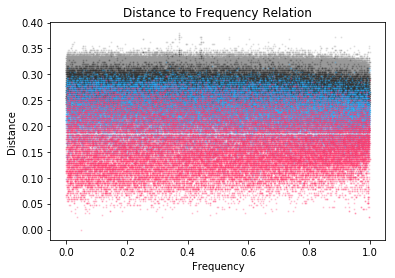

saving to opt/dist-to-freq.png
saving to opt/dist-to-freq.svg


In [134]:
N = dm.shape[0]
colors = CLR['red'][2], CLR['blue'][2], CLR['gray'][4], CLR['gray'][2]

fig, ax = _fig_before('Distance to Frequency Relation', 'Frequency', 'Distance')
patches = []

for i, color in list(zip(range(dm.shape[1]), colors))[::-1]:
    plt.scatter(np.arange(dm.shape[0]) / N, dm[:, i][::-1], s=1, alpha=0.2, color=color, )
    
_fig_after(fig, ax, patches=patches, fname='dist-to-freq')